Goal: read the most recent us-states data, reformat it and save it as excel files for downstream analysis

In [1]:
import pandas as pd

In [12]:

# We
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

# df = pd.read_csv('./us-states.csv')

In [3]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [5]:
# cases
cases_by_date = []
deaths_by_date = []

# all states
states = df.state.unique()
dates = df.date.unique()

for date in dates:
    case_row = {}    
    death_row = {} #
    df_dates = df[df.date == date]
    
    for state in states:
        # cases
        cases = df_dates[df.state == state]['cases'].values
        if len(cases) == 0:
            cases = 0
        else:
            cases = cases[0]
        case_row[state] = cases
        
        # deaths
        deaths = df_dates[df.state == state]['deaths'].values
        if len(deaths) == 0:
            deaths = 0
        else:
            deaths = deaths[0]
        death_row[state] = deaths
    
    cases_by_date.append(case_row)
    deaths_by_date.append(death_row)

/Users/stonerri/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/stonerri/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [6]:
case_by_date_df = pd.DataFrame(cases_by_date)
case_by_date_df['date'] = pd.to_datetime(dates, format='%Y-%m-%d')
cases_by_date_final = case_by_date_df.set_index('date').reindex()
cases_by_date_final.to_excel('20200426 COVID cases by date.xlsx')

In [7]:
cases_by_date_final

,Washington,Illinois,California,Arizona,Massachusetts,Wisconsin,Texas,Nebraska,Utah,Oregon,...,Alaska,Maine,Alabama,Idaho,Montana,Puerto Rico,Virgin Islands,Guam,West Virginia,Northern Mariana Islands
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-21,12345,33059,35844,5251,41199,4620,20949,1727,3301,2002,...,327,888,5327,1659,437,915,54,852,929,14
2020-04-22,12539,35108,37573,5459,42944,4845,21769,1827,3451,2059,...,333,907,5610,1688,439,915,54,911,939,14
2020-04-23,12906,36935,39534,5769,46023,5052,22706,2191,3621,2127,...,335,937,5832,1721,442,1230,54,975,981,14


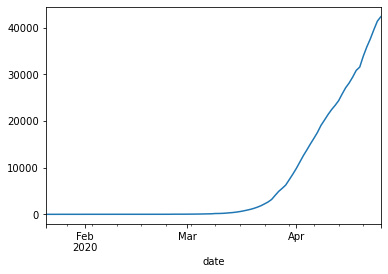

In [8]:
cases_by_date_final.resample('1D').sum()['California'].plot();

In [9]:
death_by_date_df = pd.DataFrame(deaths_by_date)
death_by_date_df['date'] = pd.to_datetime(df.date.unique())
deaths_by_date_final = death_by_date_df.set_index('date').reindex()
deaths_by_date_final.to_excel('20200426 COVID deathes by date.xlsx')

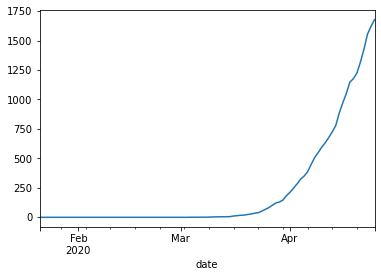

In [11]:
deaths_by_date_final.resample('1D').sum()['California'].plot();